In [1]:
import tensorflow as tf

In [3]:
import matplotlib.pyplot as plt

In [4]:
import numpy as np 
from tensorflow.keras import models,datasets,layers

In [5]:
# load datasets 

In [6]:
(X_train ,y_train),(X_test,y_test)= datasets.cifar10.load_data()

In [7]:
# shape
X_train.shape

(50000, 32, 32, 3)

In [8]:
X_test.shape

(10000, 32, 32, 3)

In [9]:
y_train.shape

(50000, 1)

In [11]:
y_train[:9]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8]], dtype=uint8)

In [12]:
y_train=y_train.reshape(-1,)
y_test=y_test.reshape(-1,)

In [13]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [14]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

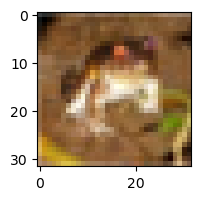

In [16]:
plt.figure(figsize=(15,2))
plt.imshow(X_train[0])

In [17]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [18]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

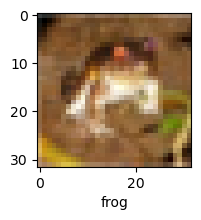

In [19]:
plot_sample(X_train,y_train,0)

In [20]:
# Noramalizing 

In [21]:
X_train=X_train/255.0

In [22]:
X_test=X_test/255.0

In [23]:
# build ann 

In [24]:
ann =models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])

C:\Users\ADIT\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [26]:
#compile 
ann.compile(
    optimizer='SGD',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
    

In [27]:
# model fit 
ann.fit(X_train,y_train, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 35ms/step - accuracy: 0.3068 - loss: 1.9233
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 37ms/step - accuracy: 0.4201 - loss: 1.6464
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 54s 35ms/step - accuracy: 0.4519 - loss: 1.5530
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.4784 - loss: 1.4863
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 54s 35ms/step - accuracy: 0.4979 - loss: 1.4347


In [28]:
# model acccuracy 49 

In [29]:
#same model cnn


In [30]:
# create model 


In [32]:
cnn=models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3) , activation='relu' , input_shape=(32,32,3)),
    layers.MaxPool2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3) , activation='relu'),
    layers.MaxPool2D((2,2)),


    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [33]:
# compile 



In [34]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [ ]:
# model fit 

In [35]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.3605 - loss: 1.7459
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.5787 - loss: 1.1888
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.6403 - loss: 1.0256
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.6685 - loss: 0.9407
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.6966 - loss: 0.8687
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.7195 - loss: 0.8113
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.7342 - loss: 0.7666
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.7493 - loss: 0.7266
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.7586 - loss: 0.6862
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.7745 - loss: 0.6388


In [36]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6938 - loss: 0.9340


[0.9383133053779602, 0.6894000172615051]

In [37]:
y_pred =cnn.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [40]:
y_pred[:1]

array([[1.7630568e-04, 2.2848519e-05, 1.9393116e-03, 8.5454816e-01,
        1.5907361e-03, 1.2979260e-01, 1.0447067e-02, 4.5979678e-04,
        9.9077192e-04, 3.2342694e-05]], dtype=float32)

In [42]:
y_arg=[np.argmax(element) for element in y_pred]

In [43]:
y_arg[:1]

[3]

In [44]:
y_test[1]

8

In [45]:
y_arg[1]

8

In [ ]:
y